### 사진학습의 문제점
1. 이미지마다 크기가 다르다.
 - 디렉토리에서 불러올 때 크기를 맞춘다. 
2. 레이블이 없다. 
 - 레이블링이 되어있다. 폴더명. 사람이 미리 분류를 해놓았음
 


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [2]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale = 1./255)
valid_datagen=ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 : ',data_batch.shape)
    print('배피 레이블 크기 : ',labels_batch.shape)
    break

배치 데이터 크기 :  (20, 150, 150, 3)
배피 레이블 크기 :  (20,)


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       validation_data=valid_generator,
                       epochs=60,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 13s 107ms/step - loss: 0.6965 - accuracy: 0.5095 - val_loss: 0.6923 - val_accuracy: 0.5930
Epoch 2/60
100/100 [==============================] - 10s 101ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6909 - val_accuracy: 0.5090
Epoch 3/60
100/100 [==============================] - 10s 101ms/step - loss: 0.6940 - accuracy: 0.5190 - val_loss: 0.6876 - val_accuracy: 0.5050
Epoch 4/60
100/100 [==============================] - 10s 104ms/step - loss: 0.6891 - accuracy: 0.5405 - val_loss: 0.6825 - val_accuracy: 0.5140
Epoch 5/60
100/100 [==============================] - 11s 107ms/step - loss: 0.6653 - accuracy: 0.6165 - val_loss: 0.6737 - val_accuracy: 0.6010
Epoch 6/60
100/100 [==============================] - 10s 105ms/step - loss: 0.6287 - accuracy: 0.6470 - val_loss: 0.6125 - val_accuracy: 0.6560
Epoch 7/60
100/100 [==============================] - 10s 104ms/step - loss: 0.5977 - accuracy: 0.6810 - val_loss: 0.6320 - val_ac

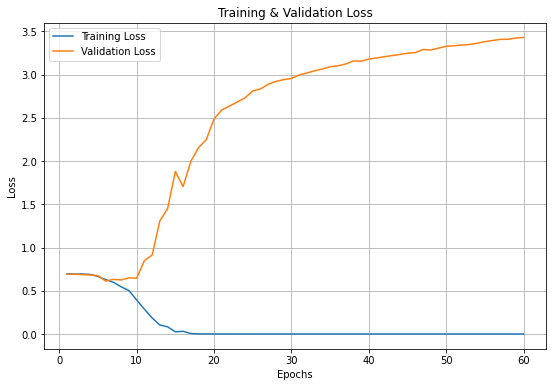

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


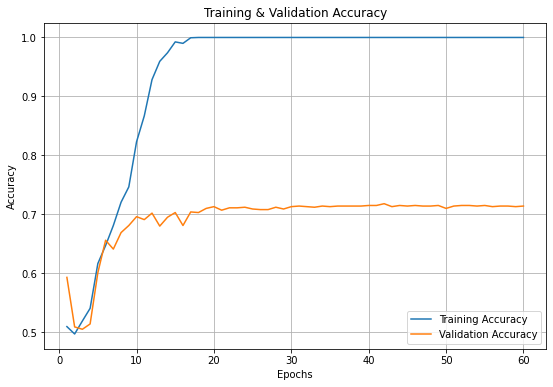

In [10]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_dandc.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [11]:
test_datagen=ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
loss,accuracy = model.evaluate(test_generator,steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 64ms/step - loss: 3.4851 - accuracy: 0.7070
Loss = 3.48513
Accuracy = 0.70700


In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [15]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [16]:
from tensorflow.keras.models import load_model
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [17]:
loss, accuracy = model_small.evaluate(test_generator,steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 67ms/step - loss: 3.4851 - accuracy: 0.7070
Loss = 3.48513
Accuracy = 0.70700
